## (2) Case Study: Source and investigate usable data sources 
##### (GenAI Life Cycle Phase 2: Data Understanding self-practice)

---

In [4]:
import ipywidgets as widgets
from IPython.display import display

# Data for the content
data = [
    ["(1a) Define the Problem", 
     "The main problem is that customers find it difficult to find restaurants that suit their tastes, which can result in decision fatigue and even bad dining experiences. Users frequently discover that, in spite of the large number of reviews and ratings, they don't match their specific needs, such as dietary restrictions, preferred food, or preferred ambiance.",
     "Key challenges:\n- There are far too many eating selections.\n- Absence of filtration that is tailored to each person's tastes and preferences.\n- Finding trustworthy insights in generic user evaluations might be challenging."],
    
    ["(1b) Understand the Business Context",
     "Welp is a website that uses ratings and reviews to improve the eating decision-making process. By reducing decision fatigue and raising user happiness, the launch of an AI-powered virtual assistant supports its objective of offering an exceptional customer experience.",
     "Business context considerations:\n- Customer base: A wide range of users with different tastes, from casual eaters to those with specific dietary needs.\n- Data assets: A comprehensive database of user reviews and past user activity that may be used to create tailored recommendations.\n- Competitive landscape: This is a critical competitive improvement because other services, like Yelp or Zomato, may already be using recommendation systems.\n- Value proposition: A distinctive and differentiating user experience through large-scale personalization using an AI solution."],
    
    ["(1c) Set Clear Objectives", 
     "Scope:\n- Create a virtual assistant powered by AI that can comprehend a wide range of dining preferences, examine massive user review datasets, and make precise, tailored restaurant and bar suggestions. The assistant should also highlight important review findings and offer substitutes where needed.",
     "Potential Impact:\n- By providing tailored, relevant restaurant recommendations, you may increase customer happiness and lessen decision fatigue. Improve the entire dining discovery process while preserving user confidence by making clear and precise recommendations.\n\nDesired Outcome:\n- The goal is to develop a fully working virtual assistant driven by AI that improves the restaurant discovery process by offering relevant, accurate, and personalized recommendations based on user preferences. The assistant seeks to lessen choice fatigue and increase user trust by streamlining decision-making, providing clear explanations for recommendations, and summarizing important review observations. In the end, this will raise customer satisfaction, encourage more participation, and establish Welp as a pioneer in customized eating experiences."]
]

# Create the content without headers
table_content = widgets.VBox([widgets.HTML(value="<b>{}</b>:<br>{}<br>{}".format(*row)) for row in data])

# Styled Box for Pre-reading Information
styled_box = widgets.Box([widgets.HTML(value="<h3 style='color: #1e7e34; display: inline;'>PRE-READING: Solution of \"(1) Practice Learning Activity: Define problems solvable by Virtual Agents \"</h3>"),
                          widgets.HTML(value="<hr style='border: 1px solid #1e7e34;'>"),  # Horizontal line for separation
                          table_content],
                         layout=widgets.Layout(
                             border="2px solid #1e7e34",
                             padding="20px",
                             width="80%",
                             margin="20px 0px"
                         ))

# Display the styled box
display(styled_box)


Box(children=(HTML(value='<h3 style=\'color: #1e7e34; display: inline;\'>PRE-READING: Solution of "(1) Practic…

---

#### Case Scenario


>
> Data Sourcing and Investigation
> To successfully develop the virtual agent, you are required to source and investigate usable data from the available datasets, provided to you in CSV files. You are given access, a detailed collection of restaurant information, ratings, cuisine types, and reviews. Anonymitized user data of the reviewers is also provided.
>
> You will begin by sourcing restaurants and reviewing data from the given dataset. The output dataset would include columns like:
> - Restaurant Name
> - Cuisine Type
> - Location
> - User Ratings
> - Review Highlights
> - Ambiance Descriptions
> - Price Range
>
> Your task is to (a) **perform Exploratory Data Analysis (EDA)** on the datasources (CSV files) provided here to get an initial understanding on the dataset provided.



---

### Pre-requisites:
1. Open a Terminal window by pressing `Ctrl + Alt + T`
    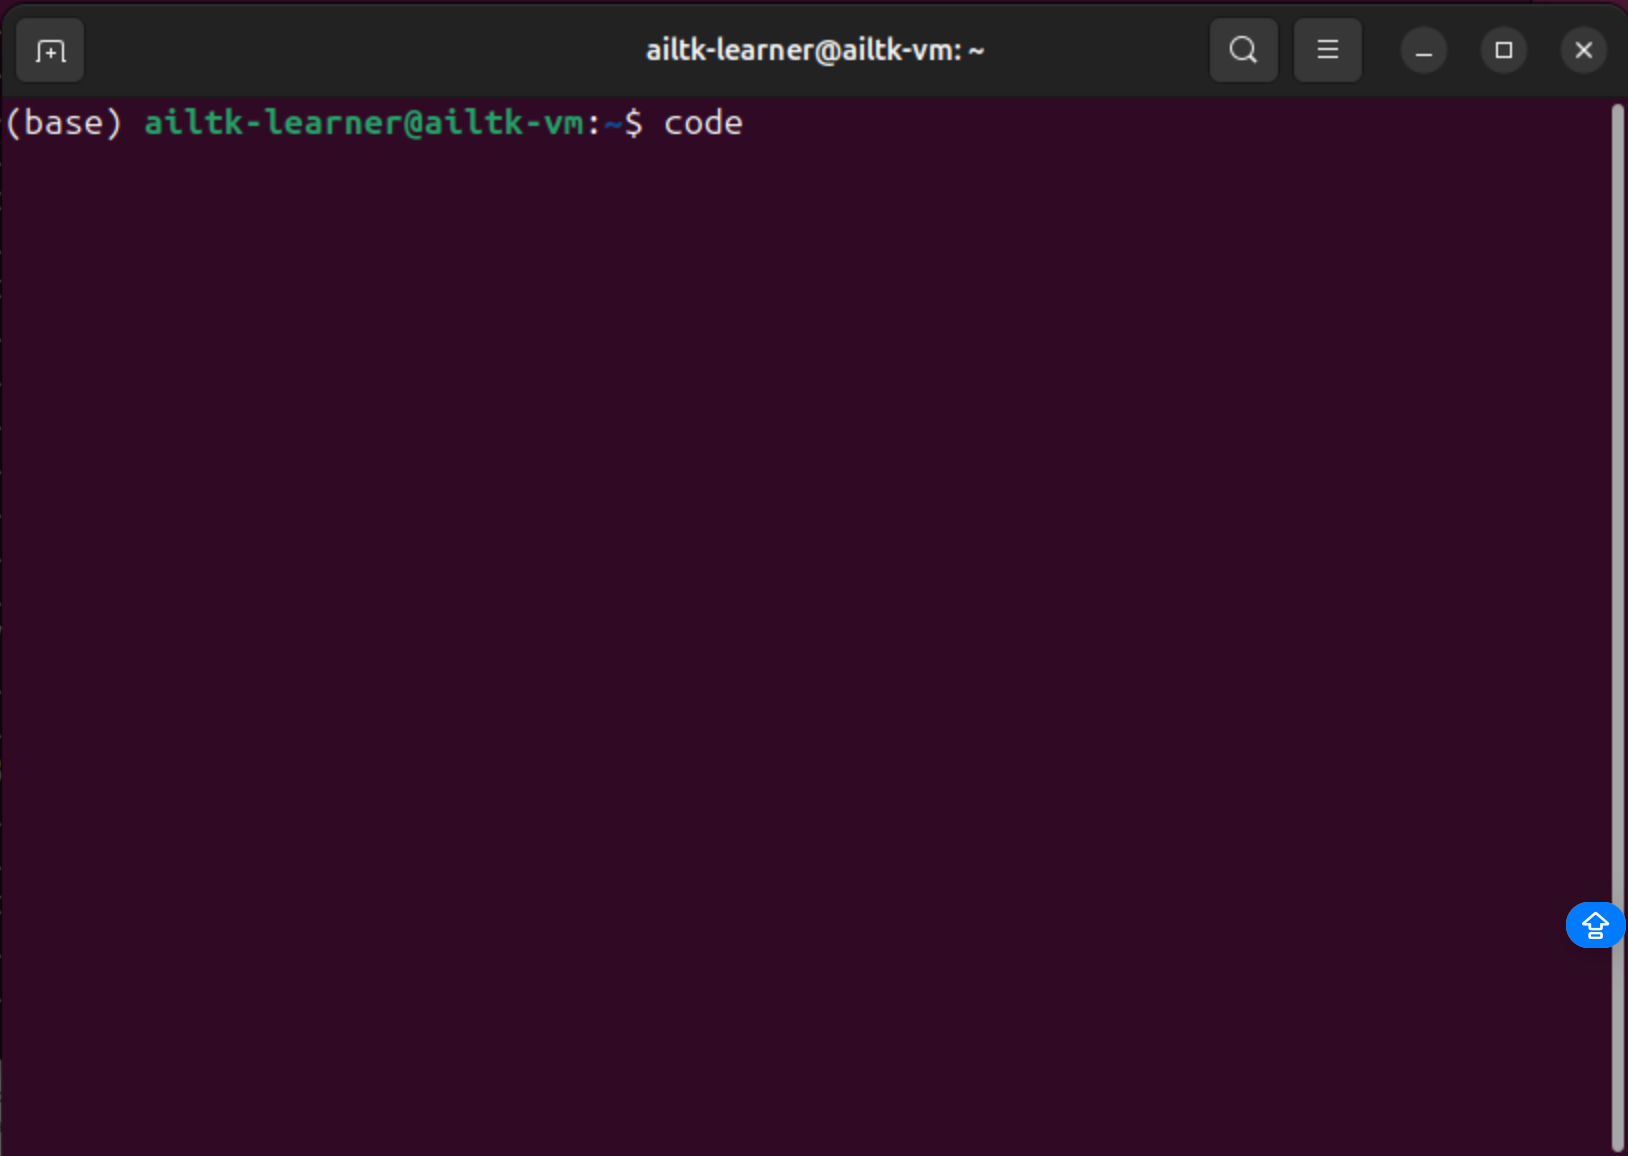
    - This will open Visual Studio Code.
        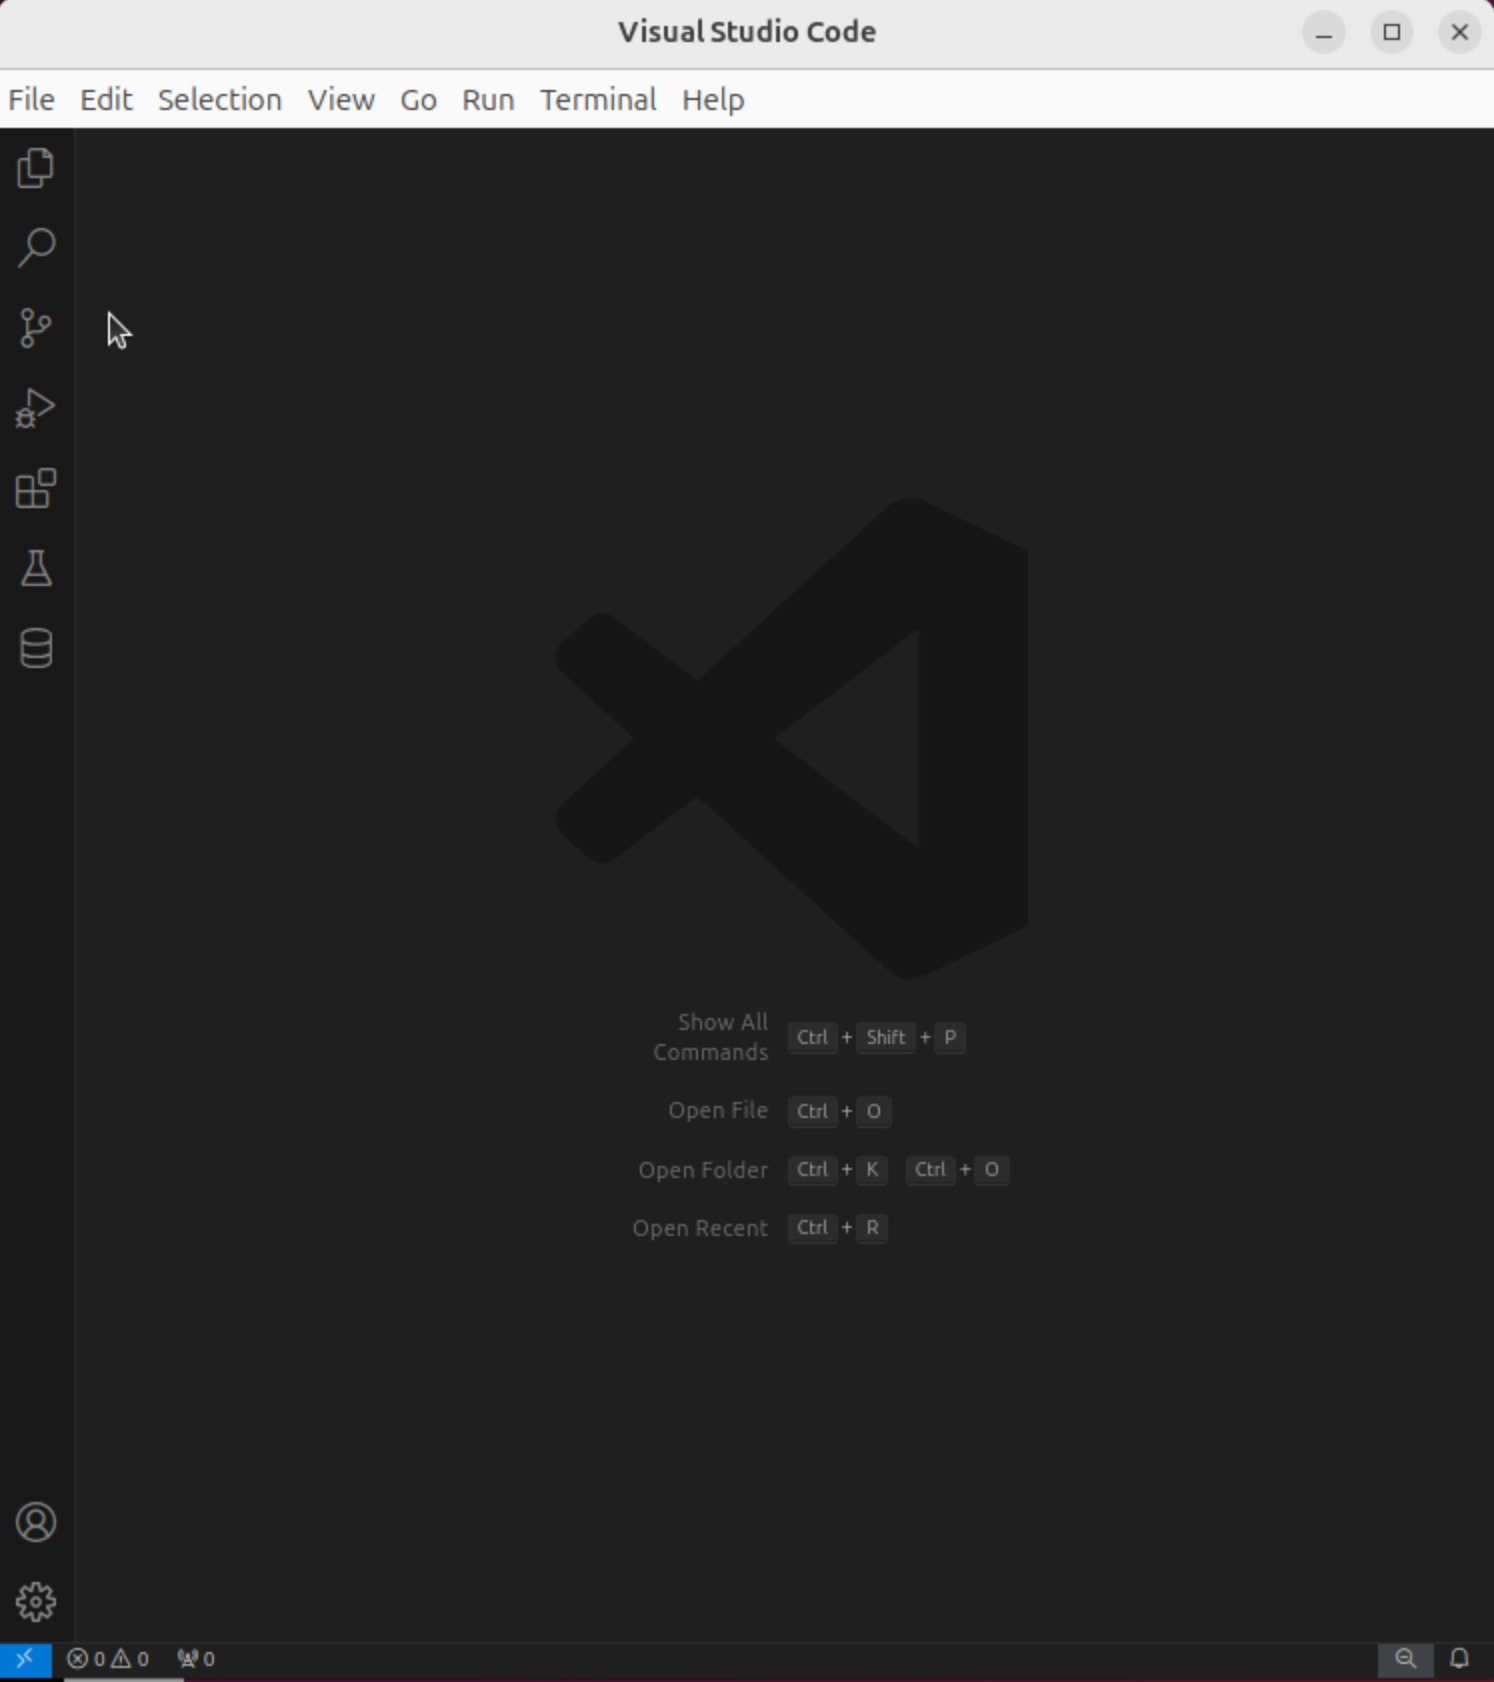
2. Navigate to `File > New File...`
    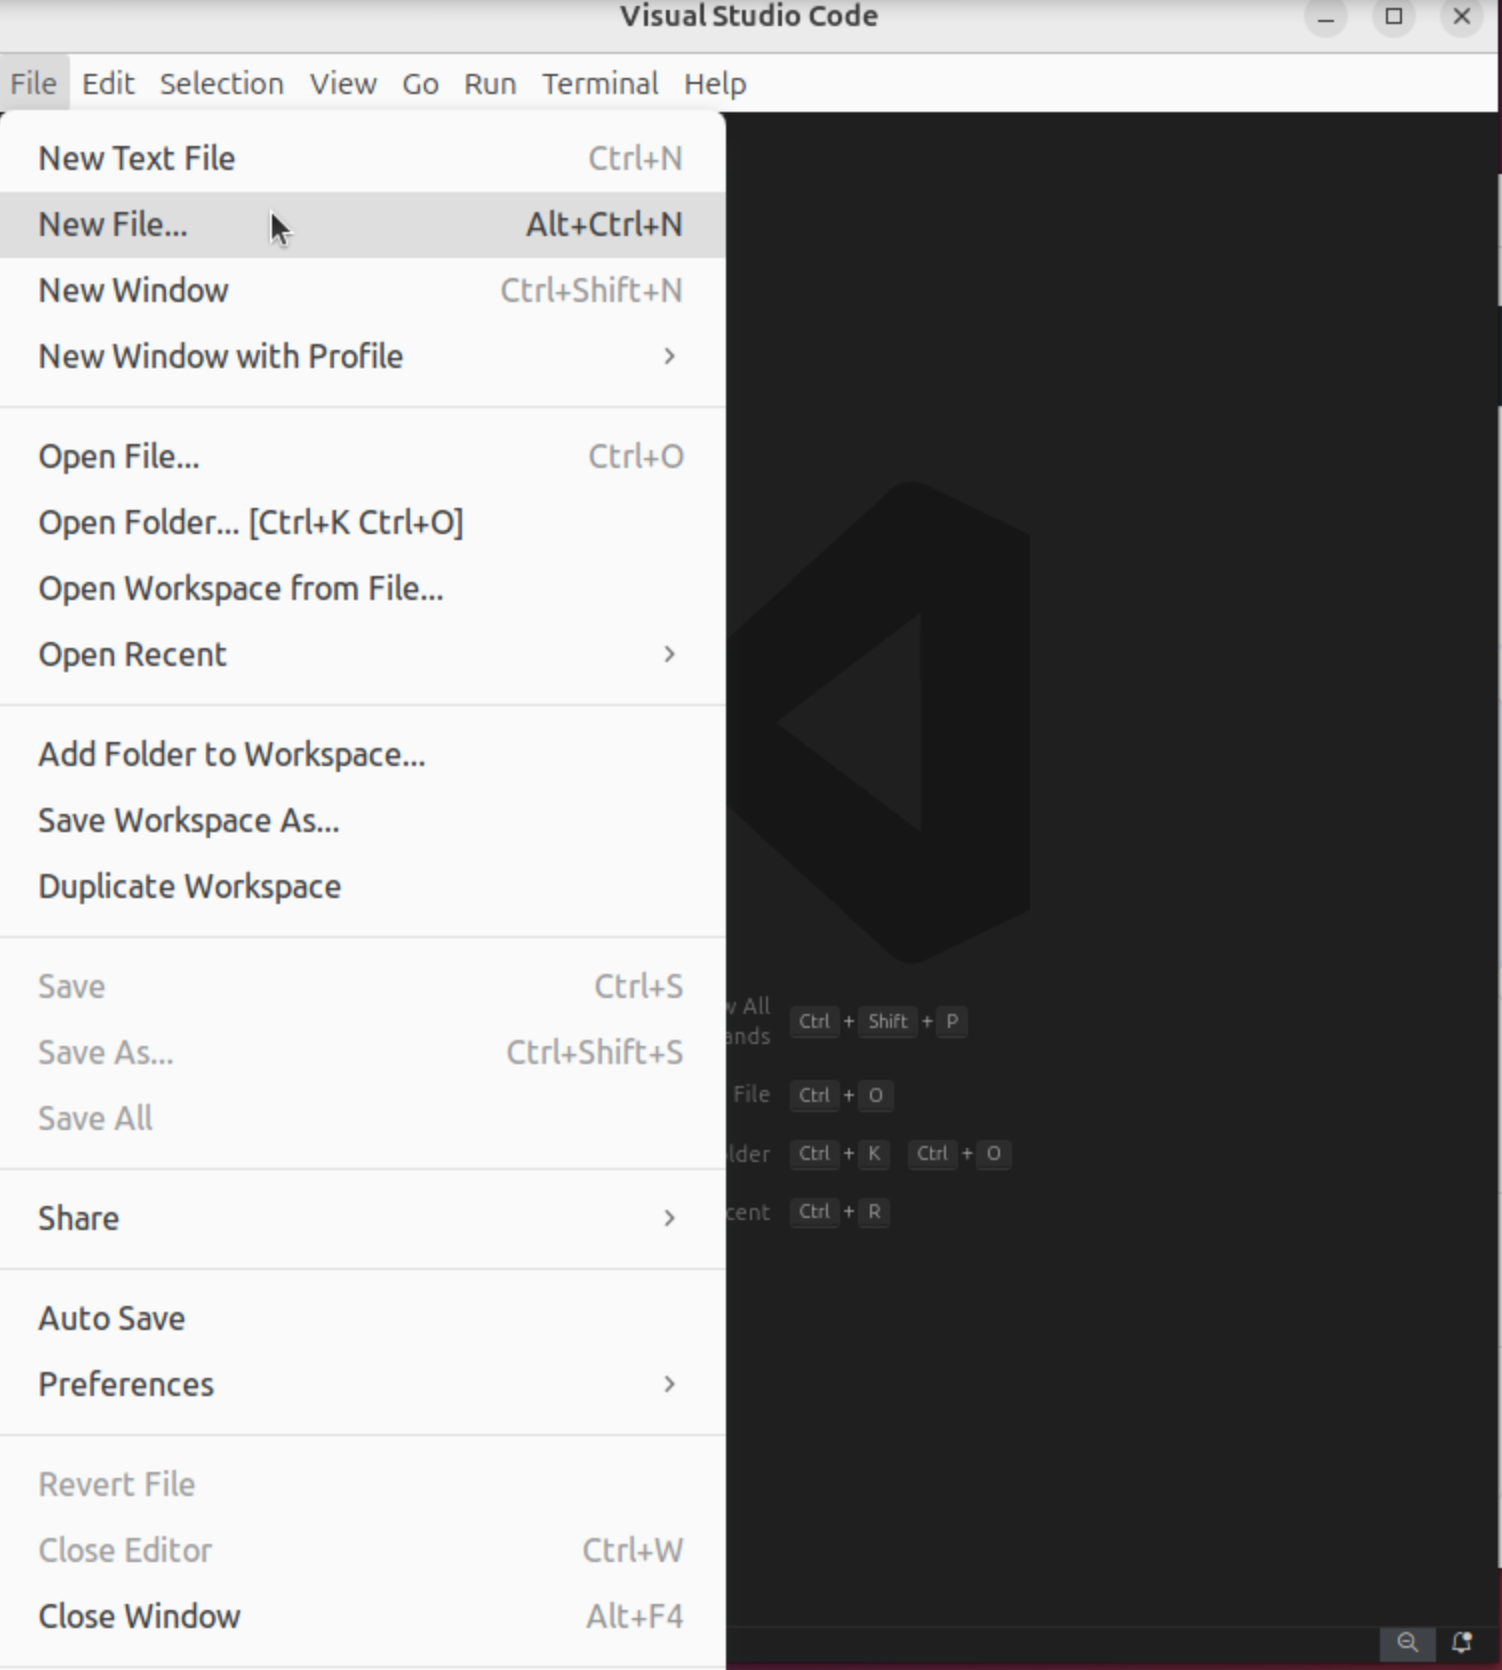
3. You will see a popup for selecting the File Type of the file created. Select "Jupyer Notebook".
    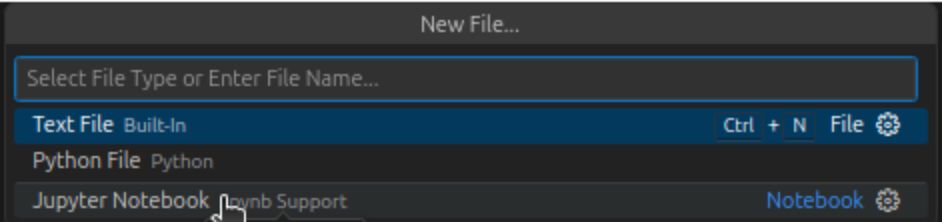
4. From there you will be able to run code as you did in the Practice Learning Activities.
5. Three datasets are available to you for this Case Study 2. You may use the following datasets for your EDA with their filepaths listed below:
    - `/home/ailtk-learner/Documents/GitHub/capstone-ailtk/ailtk_case-navigation-module/case-files/yelp_academic_dataset_business.csv`
    - `/home/ailtk-learner/Documents/GitHub/capstone-ailtk/ailtk_case-navigation-module/case-files/yelp_academic_dataset_review.csv`
    - `/home/ailtk-learner/Documents/GitHub/capstone-ailtk/ailtk_case-navigation-module/case-files/yelp_academic_dataset_user.csv`

### Perform the tasks as follows:

##### (a) **perform Exploratory Data Analysis (EDA)** on the datasources (CSV files) provided here to get an initial understanding on the dataset provided.

- Perform your EDA using the Jupyter Notebook created and the Python modules available to you in the `ailtk-env` conda environment, you are expected to get an overview of the categorical, ordinal, and interval variables present in the datasets and identify how they may later be used for the Retrieval-Augmented Generation (RAG) of a virtual agent instance in this toolkit.



> ##### SOLUTION:
> - <a href='case-files/ailtk-running-code-case-2.ipynb' target='_blank'>(Click here to open Solution: Case Study 2 in Visual Studio Code)</a><br>
> - <b>NOTE:</b> The file you will be directed to below may take a few minutes to load given the size of the datasets used in this Case Study.<br> 

---

You may reference this checklist to self-check your output for this Case Study.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Define checklist items based on key learning points
checklist_items = [
    "Have you analyzed the key variables and their distributions?",
    "Did you identify categorical, ordinal, and interval variables in the dataset?",
    "Have you considered how these variables could be used in RAG for the virtual agent?",
    
    "Have you reviewed the structure of the business dataset (yelp_academic_dataset_business.csv)?",
    "Have you examined the key attributes in the review dataset (yelp_academic_dataset_review.csv)?",
    "Have you assessed the relevant columns in the user dataset (yelp_academic_dataset_user.csv)?",
    
    "Did you correctly identify the types of data (interval, categorical, ordinal) within the dataset?",
    "Have you described the importance of each dataset (business, review, user) in supporting AI-driven recommendations?",
    " Have you considered how this analysis will inform the upcoming data transformation process?"
]


# Create checklist widgets with wrapping enabled
checkboxes = [widgets.Checkbox(value=False, description="", layout=widgets.Layout(width='auto')) for _ in checklist_items]
labels = [widgets.Label(value=item) for item in checklist_items]

# Output widget for completion message
output = widgets.Output()

# Function to check if all items are marked
def check_completion(change):
    if all(cb.value for cb in checkboxes):  # If all checkboxes are checked
        with output:
            clear_output()
            display(HTML('<p style="color: green; font-weight: bold;">✅ You have successfully covered all key points!</p>'))
    else:
        with output:
            clear_output()

# Attach event listeners to checkboxes
for cb in checkboxes:
    cb.observe(check_completion, 'value')

# Display checklist with labels for proper text wrapping
checklist_ui = [widgets.HBox([cb, label]) for cb, label in zip(checkboxes, labels)]
display(*checklist_ui, output)


Output()

---

##### Answer the following to proceed:

In [6]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# TODO: Define questions and options
questions = [
    {
        "question": "What type of data does the 'stars' column represent in the restaurant review dataset?",
        "options": [
            "Categorical data",
            "Ordinal data",
            "Interval data",
            "Nominal data"
        ],
        "answer": "Ordinal data"
    },
    {
        "question": "Which dataset provides detailed business information, such as location and review count?",
        "options": [
            "yelp_academic_dataset_review.csv",
            "yelp_academic_dataset_user.csv",
            "yelp_academic_dataset_business.csv",
            "yelp_academic_dataset_rating.csv"
        ],
        "answer": "yelp_academic_dataset_business.csv"
    },
    {
    "question": "How can we transform the business data and review data to create a more complete row of information that we use in RAG?",
    "options": [
        "Join the datasets using 'business_id' to link business details with corresponding reviews",
        "Use 'user_id' to combine business data and review data based on user activity",
        "Merge the datasets using 'stars' to match review ratings with business ratings",
        "Use 'review_id' to link business data with individual reviews"
    ],
    "answer": "Join the datasets using 'business_id' to link business details with corresponding reviews"
    },
    {
        "question": "Which dataset is crucial for understanding reviewer background?",
        "options": [
            "yelp_academic_dataset_business.csv",
            "yelp_academic_dataset_review.csv",
            "yelp_academic_dataset_user.csv",
            "yelp_academic_dataset_location.csv"
        ],
        "answer": "yelp_academic_dataset_user.csv"
    },
    {
    "question": "Which table has two references to other tables that can be used to combine data?",
    "options": [
        "Users table links to businesses and reviews",
        "Businesses table links to reviews and locations",
        "Reviews table links to businesses and users",
        "Locations table links to businesses and users"
    ],
    "answer": "Reviews table links to businesses and users"
}
]

# Widgets for questions
quiz_widgets = []
for i, q in enumerate(questions):
    question_label = widgets.Label(value=f"Q{i+1}: {q['question']}")
    options = widgets.RadioButtons(
        options=q['options'],
        description='',
        disabled=False,
        value=None,
        layout=widgets.Layout(width='90%', height='auto')  # Ensures proper layout for longer options
    )
    quiz_widgets.append((question_label, options))

# Button to submit answers
submit_button = widgets.Button(description="Submit Answers", button_style="primary")
output = widgets.Output()

# Flag to track if the error message is already displayed
error_displayed = False

# Define button click event
def on_submit_click(b):
    global error_displayed
    # Disable the submit button
    submit_button.disabled = True
    clear_output(wait=True)
    unanswered = False
    score = 0

    # Check if all questions are answered
    for i, (label, options) in enumerate(quiz_widgets):
        if options.value is None:  # If a question is left unanswered
            unanswered = True

    with output:
        if unanswered:
            if not error_displayed:  # Only display the error if it hasn't been shown already
                error_displayed = True
                # Display error message in red
                display(widgets.HTML(
                    '<p style="color: red; font-weight: bold;">Please answer all the questions before submitting.</p>'
                ))
            submit_button.disabled = False  # Re-enable button if there's an error
        else:
            error_displayed = False  # Reset the flag if all questions are answered
            submit_button.button_style = ""  # Reset button style to default after click
            # Calculate score
            for i, (label, options) in enumerate(quiz_widgets):
                user_answer = options.value
                correct_answer = questions[i]["answer"]
                if user_answer == correct_answer:
                    score += 1
                print(f"Q{i+1}: {questions[i]['question']}")
                print(f"  - Your answer: {user_answer}")
                print(f"  - Correct answer: {correct_answer}")
                print()

            print(f"You scored {score}/{len(questions)}! ({(score / len(questions)) * 100:.2f}%)")
            
            # Show Continue or Try Again button based on score
            if score >= 0.8 * len(questions):
                continue_button = widgets.HTML(
                    '<a href="case-study-3.ipynb" style="display: inline-block; padding: 10px 15px; '
                    'background-color: #28a745; color: white; text-decoration: none; border-radius: 5px;">'
                    'Continue</a>'
                )
                display(continue_button)
            else:
                try_again_button = widgets.HTML(
                    '<a href="case-study-2.ipynb" style="display: inline-block; padding: 10px 15px; '
                    'background-color: #dc3545; color: white; text-decoration: none; border-radius: 5px;">'
                    'Score at least 80% to continue. Try Again</a>'
                )
                display(try_again_button)

# Attach event to the submit button
submit_button.on_click(on_submit_click)

# Display the quiz
for label, options in quiz_widgets:
    display(label, options)
display(submit_button, output)


Label(value="Q1: What type of data does the 'stars' column represent in the restaurant review dataset?")

RadioButtons(layout=Layout(height='auto', width='90%'), options=('Categorical data', 'Ordinal data', 'Interval…

Label(value='Q2: Which dataset provides detailed business information, such as location and review count?')

RadioButtons(layout=Layout(height='auto', width='90%'), options=('yelp_academic_dataset_review.csv', 'yelp_aca…

Label(value='Q3: How can we transform the business data and review data to create a more complete row of infor…

RadioButtons(layout=Layout(height='auto', width='90%'), options=("Join the datasets using 'business_id' to lin…

Label(value='Q4: Which dataset is crucial for understanding reviewer background?')

RadioButtons(layout=Layout(height='auto', width='90%'), options=('yelp_academic_dataset_business.csv', 'yelp_a…

Label(value='Q5: Which table has two references to other tables that can be used to combine data?')

RadioButtons(layout=Layout(height='auto', width='90%'), options=('Users table links to businesses and reviews'…

Button(button_style='primary', description='Submit Answers', style=ButtonStyle())

Output()